In [1]:
from read_data import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
df = read_csv('../../input/reduced_data.csv')

CPU times: user 3min 39s, sys: 31.3 s, total: 4min 10s
Wall time: 7min 16s


In [5]:
df.head()

,ClientMacAddr,Level,lat,lng,localtime
0,62668778773016,5,1.290866,103.85172,2018-07-31 18:20:29
1,62668778810659,5,1.290866,103.85172,2018-07-31 13:42:08
2,62668778810659,5,1.290866,103.85172,2018-07-31 14:58:17
3,62668778810963,5,1.290866,103.85172,2018-07-31 17:44:47
4,62668778812803,5,1.290866,103.85172,2018-07-31 13:26:17


In [33]:
oneday = df[(df.localtime.dt.dayofyear==100) & (df.Level==5)]

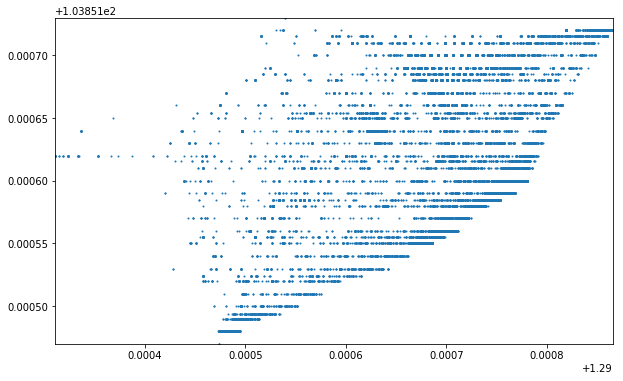

In [25]:
#5
plt.figure(figsize=(10,6))
plt.xlim([oneday.lat.min(),oneday.lat.max()])
plt.ylim([oneday.lng.min(),oneday.lng.max()])
plt.scatter(oneday.lat, oneday.lng,s=1)
plt.show()

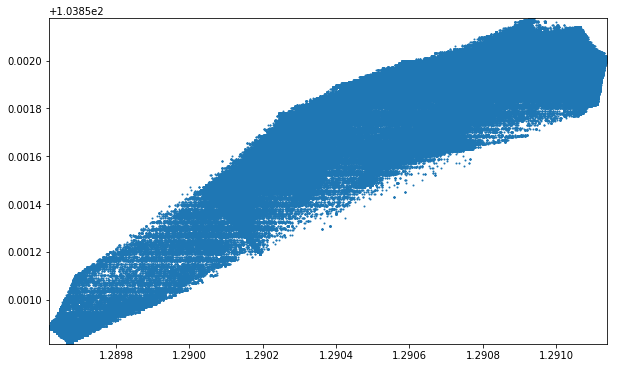

In [27]:
#1
plt.figure(figsize=(10,6))
plt.xlim([oneday.lat.min(),oneday.lat.max()])
plt.ylim([oneday.lng.min(),oneday.lng.max()])
plt.scatter(oneday.lat, oneday.lng,s=1)
plt.show()

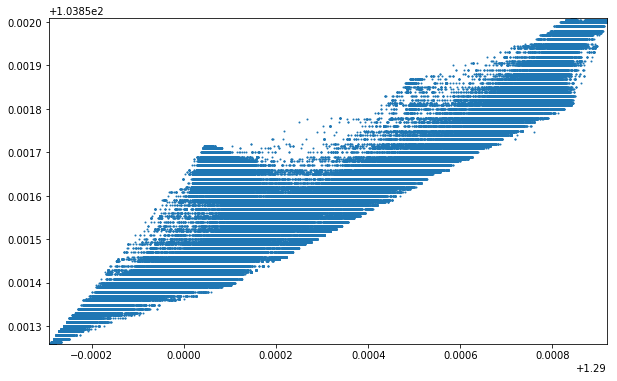

In [32]:
#B1
plt.figure(figsize=(10,6))
plt.xlim([oneday.lat.min(),oneday.lat.max()])
plt.ylim([oneday.lng.min(),oneday.lng.max()])
plt.scatter(oneday.lat, oneday.lng,s=1)
plt.show()

## 5th Floor

In [39]:
oneday = df[df.Level==5][['lat','lng','localtime']]

In [40]:
oneday.head()

,lat,lng,localtime
0,1.290866,103.85172,2018-07-31 18:20:29
1,1.290866,103.85172,2018-07-31 13:42:08
2,1.290866,103.85172,2018-07-31 14:58:17
3,1.290866,103.85172,2018-07-31 17:44:47
4,1.290866,103.85172,2018-07-31 13:26:17


In [78]:
print(oneday.lng.nunique())
print(oneday.lat.nunique())

35
4339


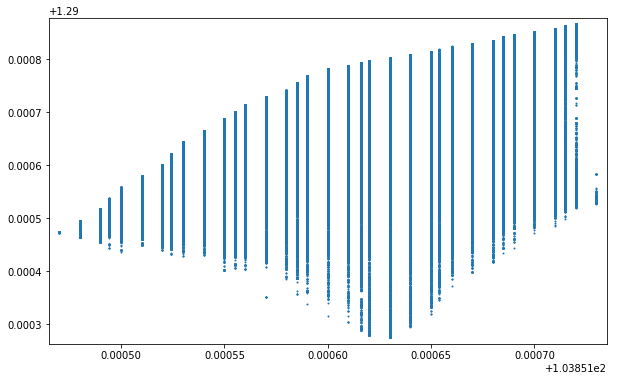

In [57]:
plt.figure(figsize=(10,6))
plt.ylim([oneday.lat.min()-np.round((oneday.lat.max()-oneday.lat.min())*0.02,6),
          oneday.lat.max()+np.round((oneday.lat.max()-oneday.lat.min())*0.02,6)])
plt.xlim([oneday.lng.min()-np.round((oneday.lng.max()-oneday.lng.min())*0.02,6),
          oneday.lng.max()+np.round((oneday.lng.max()-oneday.lng.min())*0.02,6)])
plt.scatter(oneday.lng, oneday.lat,s=1)
plt.show()

In [93]:
def mapFloor5(onefloor,latBlockNum=50):
    sortedLng=sorted(onefloor.lng.unique())
    mapper = dict(map(lambda x:(x,sortedLng.index(x)),sortedLng))
    onefloor['lngBlock']=onefloor['lng'].map(mapper)
    fMin=onefloor['lat'].min()
    fMax=onefloor['lat'].max()
    edge=np.round((fMax-fMin)*1/latBlockNum/2,7)
    fMin-=edge
    fMax+=edge
    onefloor['latBlock'] = ((onefloor['lat']-fMin)/(fMax-fMin) * latBlockNum).astype('int')
    #return onefloor

In [94]:
mapFloor5(oneday)

In [97]:
oneday.latBlock.nunique()

50

## 1st Floor

In [98]:
oneday = df[df.Level==1][['lat','lng','localtime']]

In [99]:
oneday.head()

,lat,lng,localtime
56251,1.289671,103.850815,2018-07-31 11:41:15
56252,1.289671,103.850815,2018-07-31 12:28:25
56253,1.289671,103.850815,2018-07-31 10:28:07
56254,1.289671,103.850815,2018-07-31 11:37:47
56255,1.289671,103.850815,2018-07-31 10:28:17


In [100]:
print(oneday.lng.nunique())
print(oneday.lat.nunique())

180
12773


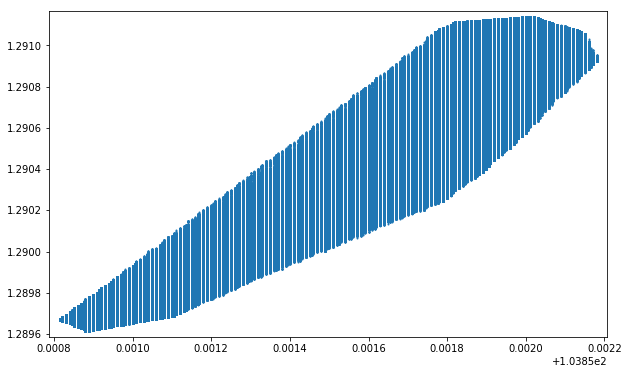

In [101]:
plt.figure(figsize=(10,6))
plt.ylim([oneday.lat.min()-np.round((oneday.lat.max()-oneday.lat.min())*0.02,6),
          oneday.lat.max()+np.round((oneday.lat.max()-oneday.lat.min())*0.02,6)])
plt.xlim([oneday.lng.min()-np.round((oneday.lng.max()-oneday.lng.min())*0.02,6),
          oneday.lng.max()+np.round((oneday.lng.max()-oneday.lng.min())*0.02,6)])
plt.scatter(oneday.lng, oneday.lat,s=1)
plt.show()

In [102]:
lngMax = oneday.lng.max()-oneday.lng.min()
latMax = oneday.lat.max()-oneday.lat.min()
oneday['transformedLng'] = oneday['lng']-oneday.lng.min()
oneday['transformedLat'] = oneday['lat']-latMax/lngMax * oneday['transformedLng']

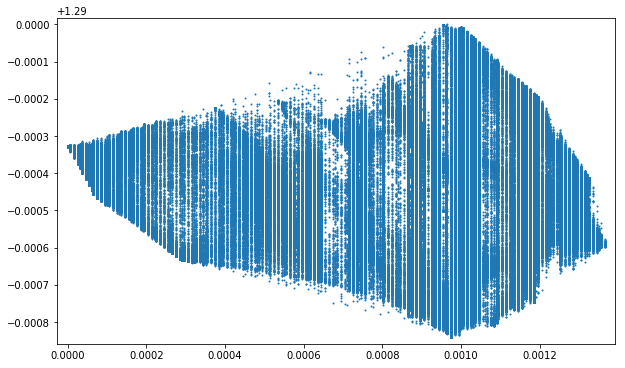

In [106]:
plt.figure(figsize=(10,6))
plt.ylim([oneday.transformedLat.min()-np.round((oneday.transformedLat.max()-oneday.transformedLat.min())*0.02,6),
          oneday.transformedLat.max()+np.round((oneday.transformedLat.max()-oneday.transformedLat.min())*0.02,6)])
plt.xlim([oneday.transformedLng.min()-np.round((oneday.transformedLng.max()-oneday.transformedLng.min())*0.02,6),
          oneday.transformedLng.max()+np.round((oneday.transformedLng.max()-oneday.transformedLng.min())*0.02,6)])
plt.scatter(oneday.transformedLng.head(1000000), oneday.transformedLat.head(1000000),s=1)
plt.show()

In [110]:
def mapFloor1(onefloor,blockNum={'transformedLng':35,'transformedLat':50}):
    lngMax = onefloor.lng.max()-onefloor.lng.min()
    latMax = onefloor.lat.max()-onefloor.lat.min()
    onefloor['transformedLng'] = onefloor['lng']-onefloor.lng.min()
    onefloor['transformedLat'] = onefloor['lat']-latMax/lngMax * onefloor['transformedLng']
    
    for f in ['transformedLng','transformedLat']:
        fMin=onefloor[f].min()
        fMax=onefloor[f].max()
        edge=np.round((fMax-fMin)*1/blockNum[f]/2,7)
        fMin-=edge
        fMax+=edge
        onefloor[f[-3:].lower()+'Block'] = ((onefloor[f]-fMin)/(fMax-fMin) * blockNum[f]).astype('int')

In [111]:
mapFloor1(oneday)

In [112]:
oneday.head()

,lat,lng,localtime,transformedLng,transformedLat,lngBlock,latBlock
56251,1.289671,103.850815,2018-07-31 11:41:15,0.0,1.289671,0,30
56252,1.289671,103.850815,2018-07-31 12:28:25,0.0,1.289671,0,30
56253,1.289671,103.850815,2018-07-31 10:28:07,0.0,1.289671,0,30
56254,1.289671,103.850815,2018-07-31 11:37:47,0.0,1.289671,0,30
56255,1.289671,103.850815,2018-07-31 10:28:17,0.0,1.289671,0,30


In [116]:
oneday.lngBlock.nunique()

35

## B1 Floor

In [117]:
oneday = df[df.Level==0][['lat','lng','localtime']]

In [118]:
oneday.head()

,lat,lng,localtime
1820288,1.290817,103.85181,2018-04-19 09:03:15
1820289,1.290744,103.85181,2018-04-19 09:02:25
1820290,1.290812,103.85181,2018-04-19 09:12:06
1820291,1.290735,103.85181,2018-04-19 10:25:31
1820292,1.290815,103.85181,2018-04-19 09:41:57


In [119]:
print(oneday.lng.nunique())
print(oneday.lat.nunique())

100
10233


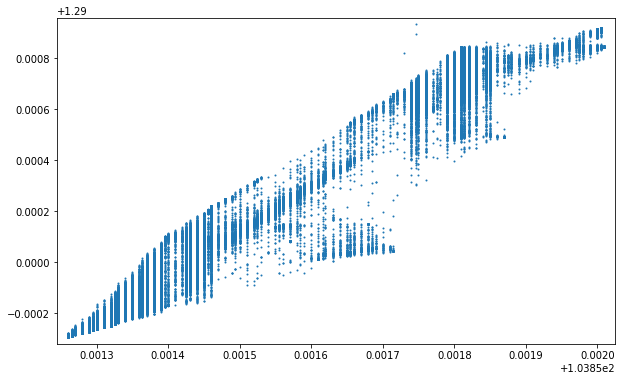

In [120]:
plt.figure(figsize=(10,6))
plt.ylim([oneday.lat.min()-np.round((oneday.lat.max()-oneday.lat.min())*0.02,6),
          oneday.lat.max()+np.round((oneday.lat.max()-oneday.lat.min())*0.02,6)])
plt.xlim([oneday.lng.min()-np.round((oneday.lng.max()-oneday.lng.min())*0.02,6),
          oneday.lng.max()+np.round((oneday.lng.max()-oneday.lng.min())*0.02,6)])
plt.scatter(oneday.lng.head(100000), oneday.lat.head(100000),s=1)
plt.show()

In [176]:
def mapFloor1AndB1(df,mask,blockNum={'transformedLng':35,'transformedLat':50}):
    lngMax = df.loc[mask].lng.max()-df.loc[mask].lng.min()
    latMax = df.loc[mask].lat.max()-df.loc[mask].lat.min()
    df.loc[mask,'transformedLng'] = df.loc[mask,'lng']-df.loc[mask].lng.min()
    df.loc[mask,'transformedLat'] = df.loc[mask,'lat']-latMax/lngMax * df.loc[mask,'transformedLng']
    
    for f in ['transformedLng','transformedLat']:
        fMin=df.loc[mask,f].min()
        fMax=df.loc[mask,f].max()
        edge=np.round((fMax-fMin)*1/blockNum[f]/2,7)
        fMin-=edge
        fMax+=edge
        df.loc[mask,f[-3:].lower()+'Block'] = ((df.loc[mask,f]-fMin)/(fMax-fMin) * blockNum[f]).astype('int')
        del df[f]
    return df

In [174]:
def mapFloor5(df,mask,latBlockNum=50):
    sortedLng=sorted(df.loc[mask].lng.unique())
    mapper = dict(map(lambda x:(x,sortedLng.index(x)),sortedLng))
    df.loc[mask,['lngBlock']]=df.loc[mask].lng.map(mapper)
    fMin=df.loc[mask,['lat']].min()
    fMax=df.loc[mask,['lat']].max()
    edge=np.round((fMax-fMin)*1/latBlockNum/2,7)
    fMin-=edge
    fMax+=edge
    df.loc[mask,['latBlock']] = ((df.loc[mask,['lat']]-fMin)/(fMax-fMin) * latBlockNum).astype('int8')
    return df
    #return onefloor

In [173]:
df['lngBlock']=pd.Series(0, dtype='int8',index=df.index)
df['latBlock']=pd.Series(0, dtype='int8',index=df.index)

In [3]:
"""df=mapFloor5(df,(df.Level==5))
df=mapFloor5(df,(df.Level==1))
df=mapFloor5(df,(df.Level==0))"""

'df=mapFloor5(df,(df.Level==5))\ndf=mapFloor5(df,(df.Level==1))\ndf=mapFloor5(df,(df.Level==0))'

In [6]:
sortedLng=sorted(df.loc[mask].lng.unique())
mapper = dict(map(lambda x:(x,sortedLng.index(x)),sortedLng))

In [5]:
df.loc[mask].lng.max()

103.85173

In [7]:
mapper

{103.85146999999999: 0,
 103.85148000000001: 1,
 103.85149: 2,
 103.85149399999999: 3,
 103.8515: 4,
 103.85151: 5,
 103.85152: 6,
 103.851524: 7,
 103.85153000000001: 8,
 103.85154: 9,
 103.85155: 10,
 103.851555: 11,
 103.85155999999999: 12,
 103.85157: 13,
 103.85158: 14,
 103.851585: 15,
 103.85159: 16,
 103.8516: 17,
 103.85161: 18,
 103.851616: 19,
 103.85162: 20,
 103.85163: 21,
 103.85164: 22,
 103.85165: 23,
 103.85165400000001: 24,
 103.85166: 25,
 103.85167: 26,
 103.85168: 27,
 103.851685: 28,
 103.85169: 29,
 103.8517: 30,
 103.85171: 31,
 103.851715: 32,
 103.85172: 33,
 103.85173: 34}

In [38]:
mask=(df.Level==1)

In [40]:
lngMax = 0.001365000000006944 #df.loc[mask].lng.max()-df.loc[mask].lng.min()
latMax = 0.0015225999999999296 #df.loc[mask].lat.max()-df.loc[mask].lat.min()
lngMin = 103.850815 #df.loc[mask].lng.min()
latMin = 1.2896163 #df.loc[mask].lat.min()
df.loc[mask,'transformedLng'] = df.loc[mask,'lng']-lngMin
df.loc[mask,'transformedLat'] = df.loc[mask,'lat']-latMin-latMax/lngMax * df.loc[mask,'transformedLng']

In [41]:
for f in ['transformedLng','transformedLat']:
    print(df.loc[mask,f].min())
    print(df.loc[mask,f].max())

0.0
0.001365000000006944
-0.0004576805860784527
0.0003848831501800001


In [91]:

MAPPER = {103.85146999999999: 0,
 103.85148000000001: 1,
 103.85149: 2,
 103.85149399999999: 3,
 103.8515: 4,
 103.85151: 5,
 103.85152: 6,
 103.851524: 7,
 103.85153000000001: 8,
 103.85154: 9,
 103.85155: 10,
 103.851555: 11,
 103.85155999999999: 12,
 103.85157: 13,
 103.85158: 14,
 103.851585: 15,
 103.85159: 16,
 103.8516: 17,
 103.85161: 18,
 103.851616: 19,
 103.85162: 20,
 103.85163: 21,
 103.85164: 22,
 103.85165: 23,
 103.85165400000001: 24,
 103.85166: 25,
 103.85167: 26,
 103.85168: 27,
 103.851685: 28,
 103.85169: 29,
 103.8517: 30,
 103.85171: 31,
 103.851715: 32,
 103.85172: 33,
 103.85173: 34}


def mapFloor5(df,latBlockNum=50):
    mask=(df.Level==5)
    df.loc[mask,['lngBlock']]=df.loc[mask].lng.map(MAPPER)
    #fMin and #fMax
    fMin=1.290275 #df.loc[mask,['lat']].min()
    fMax=1.290866 #df.loc[mask,['lat']].max()
    edge=np.round((fMax-fMin)*1/latBlockNum/2,7)
    fMin-=edge
    fMax+=edge

    df.loc[mask,'latBlock'] = ((df.loc[mask,'lat']-fMin)/(fMax-fMin) * latBlockNum).astype('int8')
    return df

def mapFloor1(df,blockNum={'transformedLng':35,'transformedLat':50}):
    mask=(df.Level==1)
    lngMax = 0.001365000000006944 #df.loc[mask].lng.max()-df.loc[mask].lng.min()
    latMax = 0.0015225999999999296 #df.loc[mask].lat.max()-df.loc[mask].lat.min()
    lngMin = 103.850815 #df.loc[mask].lng.min()
    latMin = 1.2896163 #df.loc[mask].lat.min()
    df.loc[mask,'transformedLng'] = df.loc[mask,'lng']-lngMin
    df.loc[mask,'transformedLat'] = df.loc[mask,'lat']-latMax/lngMax * df.loc[mask,'transformedLng']

    transformedMinMaxMapper={
    'transformedLng':[0.0,0.001365000000006944],
    'transformedLat':[-0.0004576805860784527,0.0003848831501800001]
    }

    for f in ['transformedLng','transformedLat']:
        fMin=transformedMinMaxMapper[f][0] #df.loc[mask,f].min()
        fMax=transformedMinMaxMapper[f][1] #df.loc[mask,f].max()
        edge=np.round((fMax-fMin)*1/blockNum[f]/2,7)
        fMin-=edge
        fMax+=edge
        df.loc[mask,f[-3:].lower()+'Block'] = ((df.loc[mask,f]-fMin)/(fMax-fMin) * blockNum[f]).astype('int8')
        del df[f]
    return df

def mapFloorB1(df,blockNum={'transformedLng':35,'transformedLat':50}):
    mask=(df.Level==0)
    lngMax = 0.0007499999999964757 #df.loc[mask].lng.max()-df.loc[mask].lng.min()
    latMax = 0.0012288000000000299 #df.loc[mask].lat.max()-df.loc[mask].lat.min()
    lngMin = 103.85126 # df.loc[mask].lng.min()
    latMin = 1.2897058000000001 #df.loc[mask].lat.min()
    df.loc[mask,'transformedLng'] = df.loc[mask,'lng']- lngMin
    df.loc[mask,'transformedLat'] = df.loc[mask,'lat']-latMin-latMax/lngMax * df.loc[mask,'transformedLng']

    transformedMinMaxMapper={
    'transformedLng':[0.0,0.0007499999999964757],
    'transformedLat':[-0.0004120640000103436,0.0004325376000042946]
    }

    for f in ['transformedLng','transformedLat']:
        fMin=transformedMinMaxMapper[f][0] #df.loc[mask,f].min()
        fMax=transformedMinMaxMapper[f][1] #df.loc[mask,f].max()
        edge=np.round((fMax-fMin)*1/blockNum[f]/2,7)
        fMin-=edge
        fMax+=edge
        df.loc[mask,f[-3:].lower()+'Block'] = ((df.loc[mask,f]-fMin)/(fMax-fMin) * blockNum[f]).astype('int8')
        del df[f]
    return df

In [92]:
chunk=df.head(10000)[["Level","lat","lng"]]

In [95]:
chunk['lngBlock']=pd.Series(127, dtype='int8',index=df.index)
chunk['latBlock']=pd.Series(127, dtype='int8',index=df.index)
chunk=mapFloor5(chunk)
chunk=mapFloor1(chunk)
chunk=mapFloorB1(chunk)

In [100]:
df.head(10).info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Level             10 non-null int8
lat               10 non-null float64
lng               10 non-null float64
transformedLng    0 non-null float64
transformedLat    0 non-null float64
dtypes: float64(4), int8(1)
memory usage: 410.0 bytes
